In [2]:
library(Seurat)
library(dplyr)
library(Matrix)
library(patchwork)
library(ggplot2)

adata<-readRDS(file="aux.seurat.shared.rds")
EnS<-read.csv(file="EU_OMA_PEM_allstroma/obs.csv")
stromal<-subset(adata,cells=as.character(EnS$X))
stromal@meta.data$mygroup<-paste0(stromal@meta.data$Major.Class,"_",stromal@meta.data$Menstrual.Cycle)
mydata<-subset(stromal,Menstrual.Cycle %in% c("Follicular","Luteal"))

statemarkers<-read.csv(file="/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/R_reanalyse/EUstroma/13EU_Menstrual_makers_FC1.csv")


Warning message:
"Removing 5750 cells missing data for vars requested"


In [6]:
head(mydata@meta.data)
head(statemarkers)
progene<-list(statemarkers$gene[statemarkers$cluster=="PEU"])
secgene<-list(statemarkers$gene[statemarkers$cluster=="SEU"])
mydata<-AddModuleScore(mydata,features=progene,ctrl=100,name="proscore",nbin=10)
mydata<-AddModuleScore(mydata,features=secgene,ctrl=100,name="secscore",nbin=10)
p1<-VlnPlot(mydata,features=c("proscore1","secscore1"),pt.size=0,group.by="mygroup")

,nCount_RNA,nFeature_RNA,orig.ident,Patient.No.,Stage,Fresh.Frozen,Major.Class,Index,percent.mito,scublet_doublet_score,...,seurat_clusters,doublet_detection_score,doublet_detection_doublet,SCT_snn_res.3,S.Score,G2M.Score,Phase,active.cluster,Menstrual.Cycle,mygroup
,<dbl>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
AGGTCCGTCATAAAGG-sample2,4397,1401,sample2,2,NA,Fresh,Endometrioma,B4,13.281783,0.17365269,...,54,8.379549,0,54,-0.03413778,-0.015283146,G1,Epithelial cells,Luteal,Endometrioma_Luteal
CCATTCGTCGATCCCT-sample2,3537,1225,sample2,2,NA,Fresh,Endometrioma,B4,17.726887,0.10638298,...,57,6.717527,0,57,-0.01291712,0.013221730,G2M,Epithelial cells,Luteal,Endometrioma_Luteal
CTGCGGAGTCAAAGCG-sample2,12161,2940,sample2,2,NA,Fresh,Endometrioma,B4,2.475125,0.29305136,...,27,8.379549,0,27,-0.01818837,-0.023766018,G1,Epithelial cells,Luteal,Endometrioma_Luteal
ACCGTAAGTCCCTTGT-sample3,4648,1468,sample3,2,NA,Fresh,Endometrioma,B5,5.507745,0.14809160,...,54,1.677011,0,54,-0.03105576,-0.005549815,G1,Epithelial cells,Luteal,Endometrioma_Luteal
AGACGTTCAGTATAAG-sample3,3063,1071,sample3,2,NA,Fresh,Endometrioma,B5,10.610513,0.06867357,...,46,1.677011,0,46,-0.00817352,-0.023994730,G1,Smooth muscle cells,Luteal,Endometrioma_Luteal
AGGGTGAAGGCGCTCT-sample3,6225,2116,sample3,2,NA,Fresh,Endometrioma,B5,3.244980,0.08737864,...,106,1.995719,0,106,-0.05052270,-0.007717558,G1,Epithelial cells,Luteal,Endometrioma_Luteal


,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,MMP11,0,5.751132,0.973,0.203,0,PEU,MMP11
2,PAMR1,0,3.782878,0.830,0.148,0,PEU,PAMR1
3,NREP,0,3.220598,0.895,0.249,0,PEU,NREP
4,CRABP2,0,2.966284,0.952,0.311,0,PEU,CRABP2
5,RBP7,0,3.603801,0.698,0.103,0,PEU,RBP7
6,MFAP2,0,2.777300,0.760,0.176,0,PEU,MFAP2


Warning message:
"The following features are not present in the object: SEPP1, not searching for symbol synonyms"


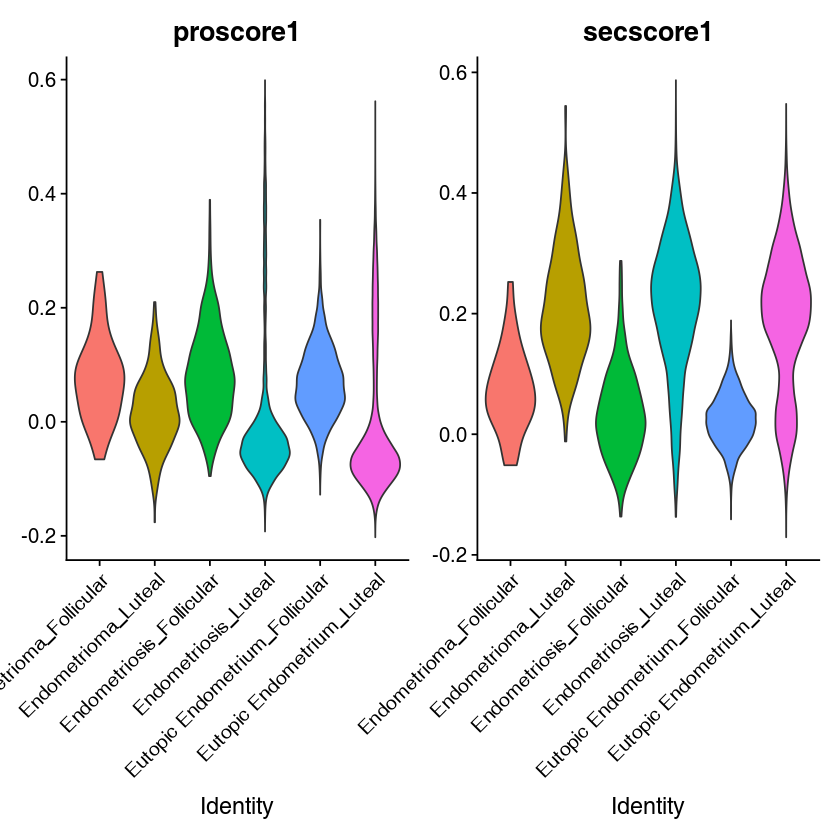

In [8]:
p1